Import all depencies

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

read and clean data

In [15]:
data_frame = pd.read_csv("../data/raw/ESA.tsv", delimiter='\t')
data_frame = data_frame.dropna(axis=0, how='any')
data_frame.head()

,Date,AA,AB,AC,AD,AE,AF,AG,AH,AI,...,BB,BC,BD,BE,BF,BG,BH,BI,BJ,BK
117,T1/2000,36.7,574.1,259.0,299.6,12.4,187.2,81.2,359.0,503.7,...,199.5,1413.5,248.2,239.2,368.5,647.1,241.2,488.6,376.4,589.0
118,T2/2000,36.6,578.2,256.4,300.7,12.8,186.2,82.1,361.8,507.1,...,202.9,1457.1,247.9,240.0,373.2,655.4,241.5,487.0,377.4,620.6
119,T3/2000,36.5,580.1,253.9,301.4,12.9,185.2,82.8,364.6,515.0,...,206.9,1483.1,247.9,240.5,377.2,662.8,238.7,487.5,378.5,632.9
120,T4/2000,36.3,582.0,251.4,302.6,13.0,185.0,83.7,368.0,519.8,...,210.0,1475.9,247.6,242.3,379.8,667.8,247.8,493.8,379.7,614.5
121,T1/2001,36.1,582.1,249.9,302.0,12.8,184.8,85.1,368.8,523.7,...,211.9,1511.3,247.3,242.8,382.8,672.4,246.8,494.1,381.1,636.0


sum all sectors

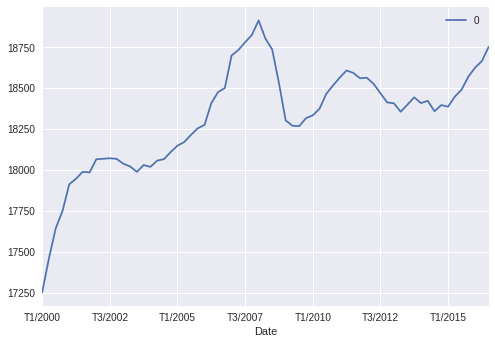

In [16]:
s = data_frame.copy().drop("Date", axis=1).sum(axis=1)
plt.figure()
d = pd.concat([s, data_frame[["Date"]]], axis=1)
d.plot(x="Date")
plt.show()

extract 4 ranges and and compute sum of them

In [17]:
d1 = pd.DataFrame(data_frame.head(16).sum(axis=0)).transpose()
d2 = pd.DataFrame(data_frame.iloc[48:64].sum(axis=0)).transpose()
d3 = pd.DataFrame(data_frame.iloc[16:32].sum(axis=0)).transpose()
d4 = pd.DataFrame(data_frame.iloc[32:48].sum(axis=0)).transpose()
data = pd.concat([d1, d3, d4, d2]).reset_index(drop=True)
data = data.drop("Date", axis=1)
data.head()
data_frame.describe()

,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,...,BB,BC,BD,BE,BF,BG,BH,BI,BJ,BK
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,27.535821,565.314925,156.117910,239.892537,11.782090,158.988060,85.295522,319.522388,443.519403,156.788060,...,212.368657,1589.789552,232.655224,282.568657,455.483582,828.332836,260.108955,528.186567,446.376119,572.958209
std,4.945359,15.628764,51.046212,40.443276,1.485784,17.395293,4.064720,35.948991,48.794747,19.959402,...,6.791577,79.524582,11.491002,24.627290,42.605436,104.146430,15.898158,22.475097,38.981787,49.866525
min,20.800000,546.100000,103.600000,180.100000,9.300000,139.600000,79.600000,262.800000,376.000000,130.000000,...,199.500000,1413.500000,208.400000,239.200000,368.500000,647.100000,238.700000,487.000000,376.400000,435.400000
25%,23.500000,551.400000,110.950000,202.450000,10.400000,141.700000,80.800000,286.750000,399.600000,139.050000,...,206.950000,1513.250000,224.850000,260.200000,421.800000,740.700000,244.600000,507.500000,419.100000,540.400000
50%,26.900000,560.200000,140.200000,241.200000,12.500000,155.700000,86.300000,329.300000,449.800000,157.600000,...,211.700000,1603.000000,234.000000,288.700000,465.200000,826.000000,259.400000,527.600000,445.700000,576.500000
75%,30.300000,580.600000,194.400000,275.550000,12.900000,177.250000,89.100000,353.250000,481.800000,168.100000,...,216.650000,1643.250000,242.400000,302.800000,494.700000,920.550000,273.300000,549.700000,484.650000,600.200000
max,36.700000,592.900000,259.000000,302.600000,13.900000,187.200000,91.300000,370.200000,525.000000,195.300000,...,227.600000,1755.300000,252.000000,327.500000,510.900000,994.800000,289.200000,560.900000,499.400000,677.500000


## job by sectors

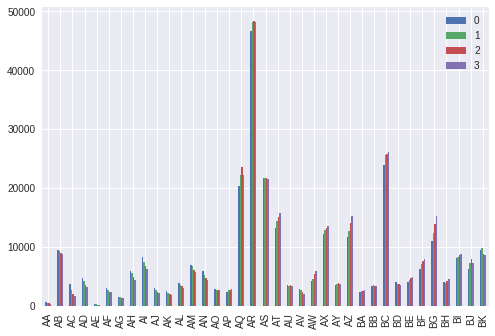

In [18]:
plt.figure(figsize=(40, 20))
d = data.copy().transpose()
d.plot.bar()
plt.show()

## Percentage of jobs by sectors

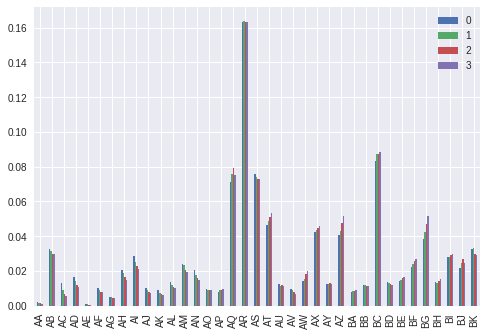

In [19]:
n_data = d / d.sum()
plt.figure(figsize=(40, 40))
n_data.plot.bar()
plt.show()

# Correlation of all sectors

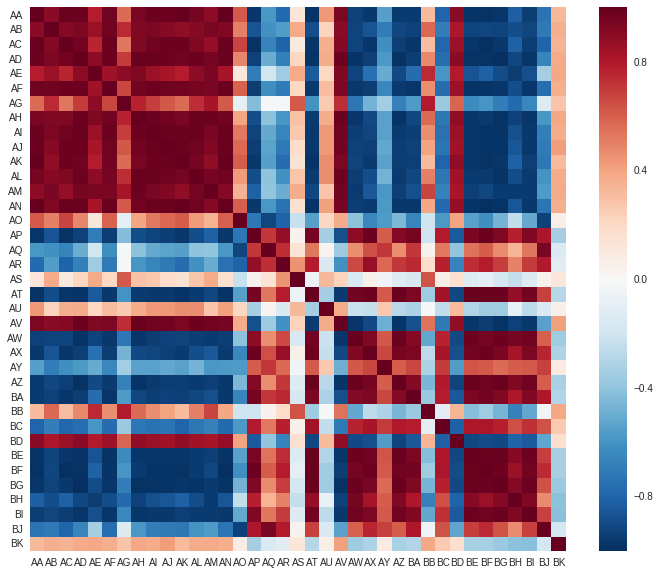

In [20]:
corr = data_frame.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

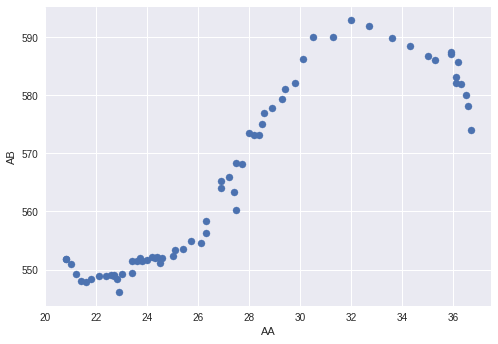

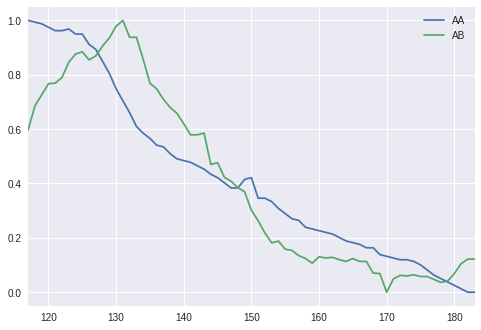

In [27]:
d_c = data_frame.copy()
plt.figure(figsize=(40, 40))
d_c.plot.scatter(x="AK", y="AN", s=50)
plt.show()
plt.figure(figsize=(40, 40))
tmp = d_c[["A", "AN"]]
tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
tmp.plot.line()
plt.show()

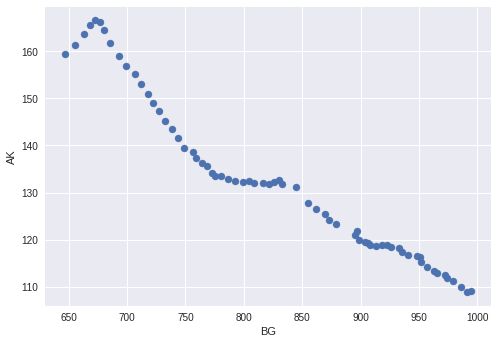

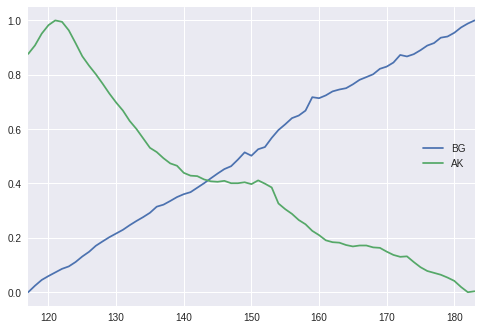

In [28]:
plt.figure(figsize=(40, 40))
d_c.plot.scatter(x="BG", y="AK", s=50)
plt.show()
plt.figure(figsize=(40, 40))
tmp = d_c[["BG", "AK"]]
tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
tmp.plot.line()
plt.show()

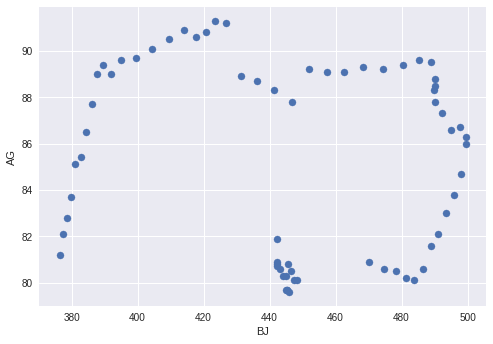

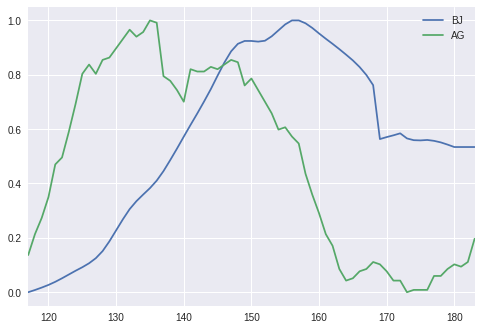

In [31]:
plt.figure(figsize=(40, 40))
d_c.plot.scatter(x="BJ", y="AG", s=50)
plt.show()
plt.figure(figsize=(40, 40))
tmp = d_c[["BJ", "AG"]]
tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
tmp.plot.line()
plt.show()